0.1071171171171171 [0.03563131] [1607.59571857]
0.2052152152152152 [0.07382576] [1637.92728156]
0.3033133133133133 [0.11876973] [1672.06245977]
0.4014114114114114 [0.17237982] [1710.88158209]
0.4995095095095095 [0.23735049] [1755.57189082]
0.5976076076076076 [0.31757604] [1807.77378171]
0.6957057057057057 [0.41886385] [1869.81598515]
0.7938038038038038 [0.55018128] [1945.1036897]
0.8919019019019019 [0.72590099] [2038.77022471]
0.99 [0.9698974] [2158.7620367]


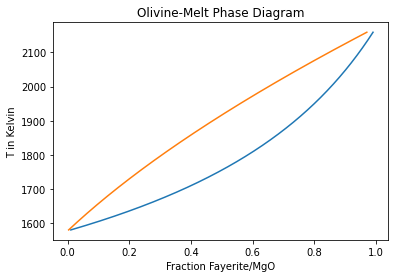

In [62]:
import numpy as np
from matplotlib import pylab as plt
from scipy.optimize import fsolve

#Constants---------------------------------------------
#in J
S_ol_mg = 52.05
S_ol_fe = 69.6

#in kJ, convert to J
H_ol_mg = 113.1*1000
H_ol_fe = 109.9*1000

#gas constant
R = 8.3145

#Partition Coefficients A and B
A = .299
B = .027

#Methods-----------------------------------------------
def melt_to_ol(y):
    def func(x):
        return A*x/y + B -(1-x)/(1-y)
    
    return fsolve(func,0.001)

def ol_to_melt(x):
    def func(y):
        return A*x/y + B -(1-x)/(1-y)
    return fsolve(func,0.001)

#test
#print(melt_to_ol(0.07164))
#print(ol_to_melt(.2))
#print('For ol frac .2, D = ',.2/ol_to_melt(.2))
#expect x=.2 => y = .0716 => D = 2.7

#Plotting--------------------------------------------
x_plot = np.linspace(.01,.99,1000) #don't use 1 and 0 because of divide by 0 errors, closer to 0 or 1 triggers fsolve problems
y_plot = []
T_plot = []
counter = 0

for x in x_plot:
    y = ol_to_melt(x)
    y_plot.append(y)

    D = x/y
    #assuming atmospheric pressure, and pure olivine/melt, equation 10 of Beattie becomes
    T = (H_ol_mg/R)/(S_ol_mg/R+2*np.log(D))
    T_plot.append(T)
    counter+=1
    if counter%100 == 0:
        print(x,y,T)
plt.plot(x_plot,T_plot)
plt.plot(y_plot,T_plot)
plt.title('Olivine-Melt Phase Diagram')
plt.xlabel('Fraction Fayerite/MgO')
plt.ylabel('T in Kelvin')
plt.show()